<a href="https://colab.research.google.com/github/penguinlin777/data_processing/blob/main/20221123_SY128_cool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DanDan Requirements

2nd col -> 2nd maximum -> z

fig 1: x -> 4th col * 10 y -> 2nd

fig 2: x -> 1 / 开尔文(T) y -> 1 / z

fig 3: 拟合，GRG


In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# Read File
First, connect to google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
FILE_PATH = "/content/drive/MyDrive/data/PS-PMVS_SY/20221123_SY128_cool"  # change data floder path here

df_list = []
temp_list = []
END_ROWS = 3400 - 16
def temp_convertor(center_degree):
  return center_degree + 273

for file_name in os.listdir(FILE_PATH):
  df = pd.read_csv(FILE_PATH + "/" + file_name, sep='\s+|\t| ', 
        header=None, error_bad_lines=False, skiprows=16)
  df = df.iloc[:END_ROWS, 0:4]
  shape_x, shape_y = df.shape
  if shape_y != 4 or shape_y > 5000:
    print("file name:" + file_name)
    raise Exception("Wrong file format")
  df_list.append(df)
  # 从文件名中提取温度值，根据文件名选用下面的语句
  # converted_name = file_name[1:file_name.find('_')] # Option 1
  converted_name = file_name[0:file_name.find('.')] # Option 2
  temp_list.append(temp_convertor(int(converted_name)))

for df, file_name in zip(df_list, os.listdir(FILE_PATH)):
  print(file_name)
  print(df.head(3))

print(temp_list)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


290.plt
       0           1           2         3
0  0.001  112.719467    0.000000  0.000071
1  0.002  112.719460  348.140995  0.000142
2  0.003  117.562057  163.915122  0.000213
280.plt
       0          1           2         3
0  0.001  44.007095    0.000000  0.000071
1  0.002  44.007092  217.528943  0.000142
2  0.003  41.785728   97.723592  0.000213
270.plt
       0          1           2         3
0  0.001  26.146921    0.000000  0.000071
1  0.002  26.146921  167.674105  0.000142
2  0.003  24.039562   74.122270  0.000213
260.plt
       0          1           2         3
0  0.001  44.007095    0.000000  0.000071
1  0.002  44.007092  217.528943  0.000142
2  0.003  42.406544   98.446861  0.000213
250.plt
       0          1           2         3
0  0.001  44.007095    0.000000  0.000071
1  0.002  44.007092  217.528943  0.000142
2  0.003  41.134846   96.959500  0.000213
130.plt
       0    1    2         3
0  0.001  0.0  0.0  0.000071
1  0.002  0.0  0.0  0.000142
2  0.003  0.0  0.0  0

# Fig 1

x: 4th col * 10 

y: 2nd

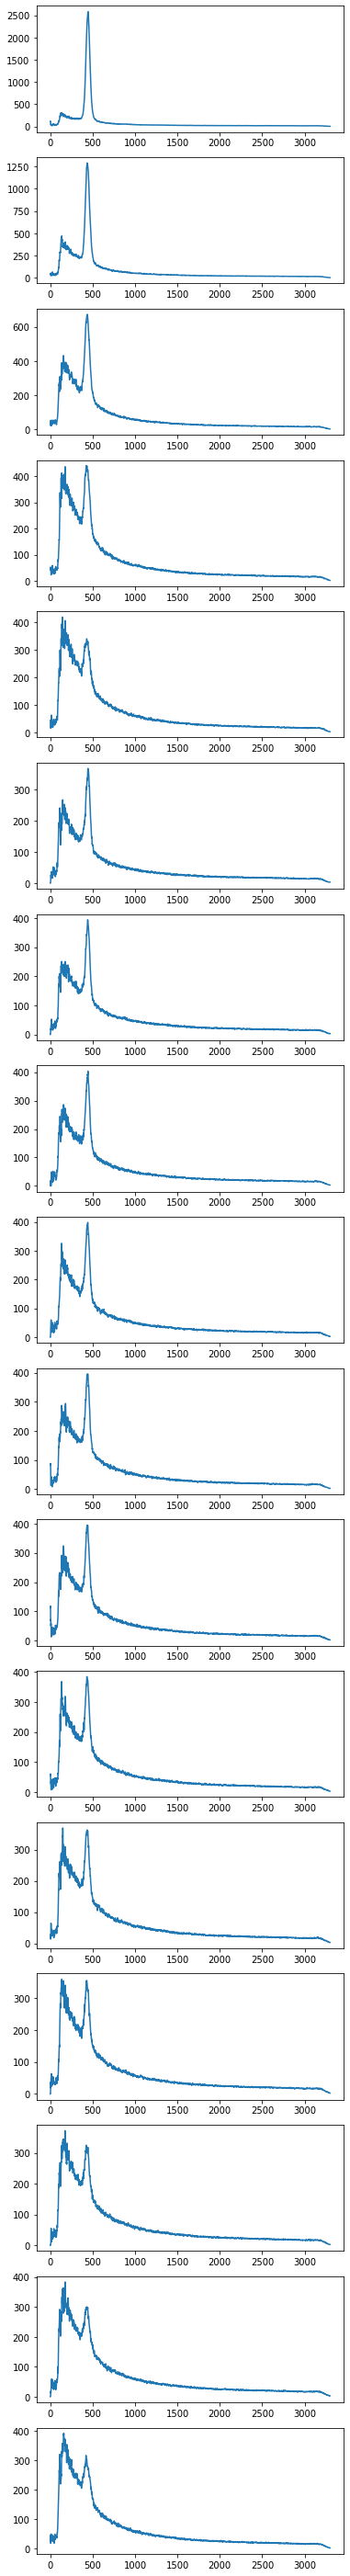

In [ ]:
# sns.set()
sns.reset_orig()

# set figure size
plt.figure(figsize=(6, 3 * len(df_list)))

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
  # plt.plot(df.iloc[:, 3] * 10, df.iloc[:, 1])   # Option 1: real x axis
  plt.plot(range(len(df.iloc[:, 1])), df.iloc[:, 1])  # Option 2: index

# Fig 2
Find second peaks with scipy

In [ ]:
# Option1: scipy find_peaks

# second_peaks = []
# peaks_value = []

# for i, df in enumerate(df_list):
#   data = df.iloc[:, 1]
#   res, _ = find_peaks(data, height=500, distance=100)

#   if len(res) != 2:
#     raise Exception("Find peaks error, you need to adjust parameters in find_peaks")
#   second_peaks.append([res[1], data[res[1]]])
#   peaks_value.append(data[res[1]])

# print(second_peaks)

In [ ]:
# Option 2: region maximum

REGION_START = 400
REGION_END = 500

peaks_value = []

for df in df_list:
  data = df.iloc[:, 1]
  peaks_value.append(max(data[REGION_START:REGION_END]))

print(peaks_value)

[2582.596924, 1287.580078, 673.210144, 439.270172, 339.449005, 367.177429, 393.893341, 403.865631, 398.385986, 395.982178, 394.105286, 384.945496, 363.259308, 354.349579, 324.881805, 300.417206, 317.341766]


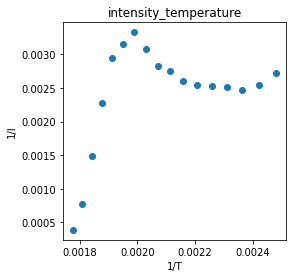

In [ ]:
x = [1 / temp for temp in temp_list]
y = [1 / peak for peak in peaks_value]
# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(4, 4))
# 图片标题 
plt.title('intensity_temperature')
# 轴标题
plt.xlabel('1/T')
plt.ylabel('1/I')
# 画布粗细和刻度

plt.scatter(x, y, linewidth = 1.0, linestyle = '-')
plt.show()

[(0.0017761989342806395, 0.00038720715211383876), (0.0018083182640144665, 0.0007766507241656779), (0.001841620626151013, 0.0014854202791097573), (0.001876172607879925, 0.0022765033087655223), (0.0019120458891013384, 0.002945950600149793), (0.001949317738791423, 0.0031511767663131994), (0.0019880715705765406, 0.0033287041488562407), (0.002028397565922921, 0.00307804248994492), (0.002070393374741201, 0.0028220719291442986), (0.0021141649048625794, 0.002752854443030542), (0.0021598272138228943, 0.002597770360716209), (0.002207505518763797, 0.0025373930153273815), (0.002257336343115124, 0.002525366179484977), (0.0023094688221709007, 0.0025101284561751627), (0.002364066193853428, 0.002476071057405724), (0.002421307506053269, 0.0025387583284887266), (0.0024813895781637717, 0.002723478953277381)]


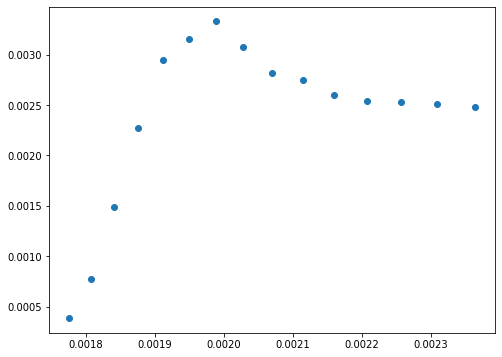

In [ ]:
# sort
def sort_data(x, y):
  xy = [(xi, yi) for xi, yi in zip(x, y)]
  sorted_xy = sorted(xy, key=lambda item: item[0])
  print(sorted_xy)

  return [xi for xi, _ in sorted_xy], [yi for _, yi in sorted_xy]

x, y = sort_data(x, y)

plt.figure(figsize=(8, 6))
plt.scatter(x[0:15], y[0:15])
plt.show()

# Fig 3

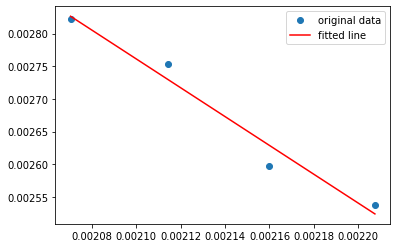

In [ ]:
# linear regression

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize
from scipy.optimize import leastsq

x_fit = x[8:12]
y_fit = y[8:12]
# z1 = np.polyfit(x_fit, y_fit, 1)
# p1 = np. poly1d(z1)
# y_fitted = p1(x_fit)
# plt.scatter(x_fit, y_fit)
# plt.plot(x_fit, y_fitted)
# plt.show
res = st.linregress(x_fit, y_fit)
plt.plot(x_fit, y_fit, 'o', label='original data')
plt.plot(x_fit, res.intercept + res.slope*np.array(x_fit), 'r', label='fitted line')
plt.legend()
plt.show()

# Fig 4

Fitting

Equations: @dandan

Objective:

The minimum of [the sum of least squares] for I_q_fit and I_q
note:

1. in dandan's case the subscript PMMA is PAGE
2. q is the forth column * 10
3. need rewrite: df.iloc[:, 3] * 10 is q; df.iloc[:, 1] is I_q
altering parameters (the last equation):
  - b_PS
  - b_PAGE
  - A_0
  - chi

Inputs: 
- M_w
- M_n
- M_n_PS
- a_1
- b_5
- m_S
- m_A
- rho_PS
- rho_PAGE
- v_nor = 118

Equation:
- w_PS = (m_S * b_5 / 5) / (m_A * a_1 + m_S * b_5 / 5)
- f_PS = w_PS / rho_PS / (w_PS / rho_PS + (1 - w_PS) / rho_PAGE)
- D_PS = D_PAGE = 1+(M_w / M_n - 1) / (w_PS ** 2 + (1 - w_PS))
- v_PS = m_S / rho_PS /  0.602
- v_PAGE = m_A / rho_PAGE / 0.602
- N_PS = v_PS * M_n_PS / v_nor / m_S
- N_PAGE = v_PAGE * (M_n - M_n_PS) / v_nor / m_A
- y_PS = N_PS * b_PS ** 2 * q ** 2 / 6
- y_PAGE = N_PAGE * b_PAGE ** 2 * q ** 2 / 6
- g1_PS = (1 - (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS
- g1_PAGE = (1 - (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE - 1) ** -1)) / y_PAGE
- g2_PS = 2 * (-1 + y_PS + (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS ** 2
- g2_PAGE = 2 * (-1 + y_PAGE + (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE -1) ** -1)) / y_PAGE ** 2
- rc = (v_PS * N_PS + v_PAGE * N_PAGE) / (v_PS * v_PAGE) ** 1/2
- s_PS_PS = rc * f_PS ** 2 * g2_PS
- s_PAGE_PAGE = rc * (1 - f_PS) ** 2 * g2_PS
- s_PS_PAGE = rc * f_PS * (1 - f_PS) * g1_PS * g1_PAGE
- S_q = s_PS_PS + 2 * s_PS_PAGE + s_PAGE_PAGE
- W_q = s_PS_PS * s_PAGE_PAGE - s_PS_PAGE ** 2
- I_q_fit = A_0 / (S_q / W_q - 2 * chi)

# Fig 5

Gaussian fitting of second peak in Fig 1

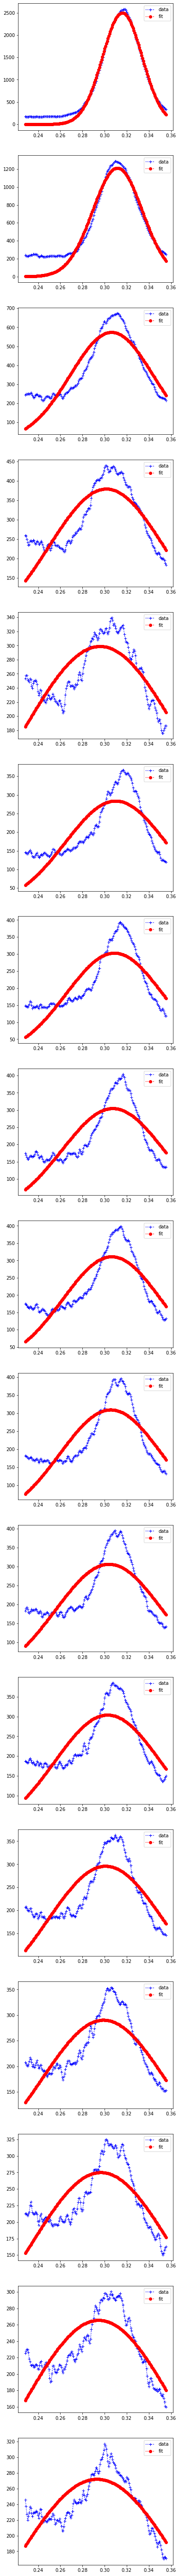

In [ ]:
from scipy.optimize import curve_fit
import warnings
import numpy as np

warnings.filterwarnings('ignore')

START_REGION = 320
END_REGION  = 500

def gaus(x, a, x0, sigma):
  return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

plt.figure(figsize=(6, 6 * len(df_list)))

fit_opt = []  # fitting parameters

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
  x = df.iloc[START_REGION: END_REGION, 3] * 10
  y = df.iloc[START_REGION: END_REGION, 1]

  n = len(x)                    
  mean = sum(x * y) / sum(y)
  sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

  popt, pcov = curve_fit(gaus, x, y, p0=[1, mean, sigma])
  fit_opt.append(popt)
  # popt是优化之后的三个参数，直接带入gauss使用
  plt.plot(x, y, 'b+:', label='data')
  plt.plot(x, gaus(x, *popt), 'ro:', label='fit')
  plt.legend()

FWHM:0.042
FWHM:0.053
FWHM:0.088
FWHM:0.123
FWHM:0.162
FWHM:0.108
FWHM:0.103
FWHM:0.108
FWHM:0.104
FWHM:0.109
FWHM:0.114
FWHM:0.114
FWHM:0.123
FWHM:0.131
FWHM:0.148
FWHM:0.163
FWHM:0.176


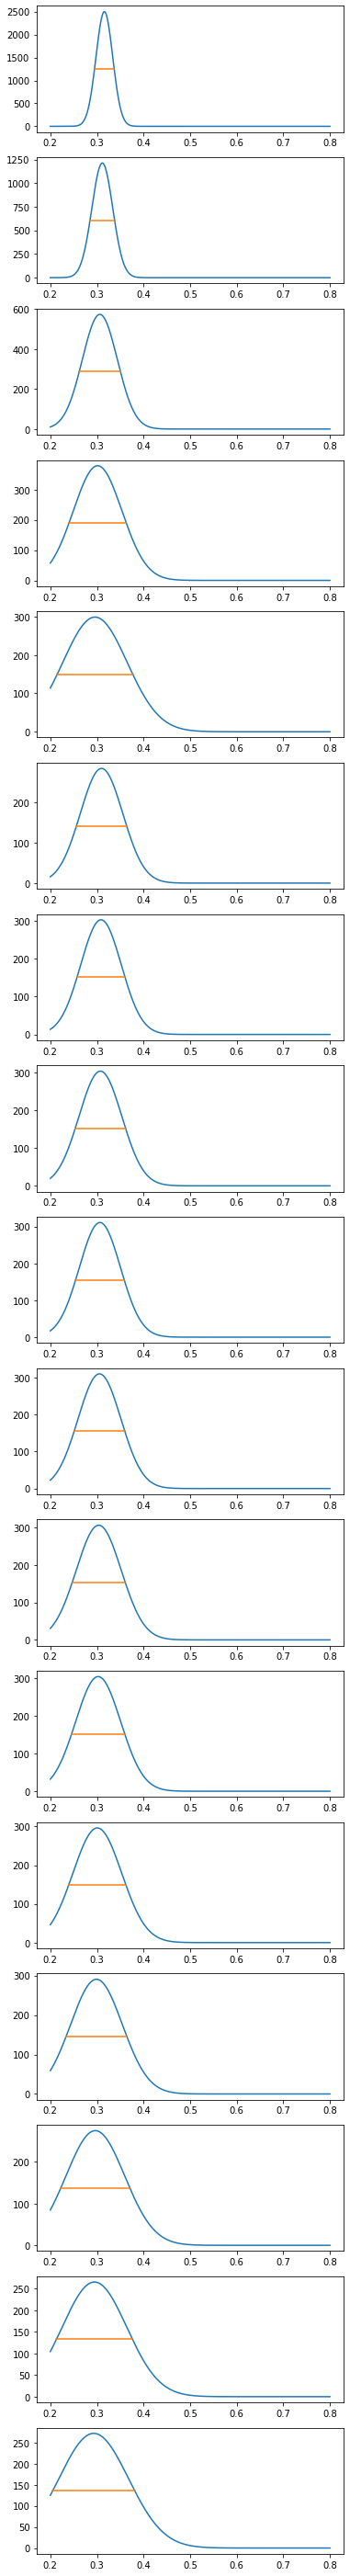

In [ ]:
# 峰值的半峰宽度
def peak(x, c):
  return np.exp(-np.power(x - c, 2) / 16.0)

def lin_interp(x, y, i, half):
  return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
  half = (max(y) - min(y)) / 2.0
  signs = np.sign(np.add(y, -half))
  zero_crossings = (signs[0:-2] != signs[1:-1])
  zero_crossings_i = np.where(zero_crossings)[0]
  return [lin_interp(x, y, zero_crossings_i[0], half), lin_interp(x, y, zero_crossings_i[1], half)]

START_GEN = 0.2   # region start and end
END_GEN = 0.8
hw_result = []    # store result

plt.figure(figsize=(6, 3 * len(df_list)))

for i, opt in enumerate(fit_opt):
  x = np.linspace(START_GEN, END_GEN, 1000)
  y = gaus(x, *opt)

  # find the two crossing points
  hmx = half_max_x(x, y)

  # print the answer
  fwhm = hmx[1] - hmx[0]
  hw_result.append(fwhm)
  print("FWHM:{:.3f}".format(fwhm))

  # a convincing plot
  half = max(y) / 2.0

  # plot
  plt.subplot(len(df_list), 1, i + 1)
  plt.plot(x, y)
  plt.plot(hmx, [half, half])

# Fig 6

[(130, 9.297924213818446), (140, 9.733177512426339), (150, 9.245301042946371), (160, 9.597113536128663), (170, 9.21431392734156), (180, 8.772414091847192), (190, 8.775657404132748), (200, 8.120121347750635), (210, 7.654412603472123), (220, 6.753574987787065), (230, 6.13224730294247), (240, 5.690123316714712), (250, 6.158486895880071), (260, 8.133790430286917), (270, 11.308178729351537), (280, 18.92230788664522), (290, 23.68527229964782)]


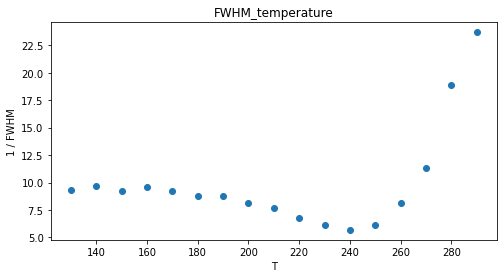

             0
9.297924   130
9.733178   140
9.245301   150
9.597114   160
9.214314   170
8.772414   180
8.775657   190
8.120121   200
7.654413   210
6.753575   220
6.132247   230
5.690123   240
6.158487   250
8.133790   260
11.308179  270
18.922308  280
23.685272  290


In [ ]:
from tabulate import tabulate

x = [temp - 273 for temp in temp_list]
y = [1 / hw for hw in hw_result]

x, y = sort_data(x, y)

# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(8, 4))
# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
# 画布粗细和刻度
plt.scatter(x[0:], y[0:], linewidth = 1.0, linestyle = '-')
plt.show()
df = pd.DataFrame(x[0:],y[0:])
print(df)

# Fig 7

ValueError: ignored

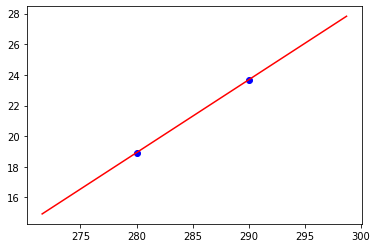

In [ ]:
import numpy as np
import sympy

x_fit1 = x[15:17]
y_fit1 = y[15:17]

res1 = st.linregress(x_fit1, y_fit1)
plt.scatter(x_fit1, y_fit1, color='b', label='original data')
x_fitted1 = np.linspace(0.97 * x_fit1[0], 1.03 * x_fit1[len(x_fit1) - 1], 20)   # x coordination
plt.plot(x_fitted1, res1.intercept + res1.slope*np.array(x_fitted1), 'r', label='fitted line')

x_fit2 = x[17:]
y_fit2 = y[17:]
res2 = st.linregress(x_fit2, y_fit2)
plt.scatter(x_fit2, y_fit2, color='b', label='original data')
x_fitted2 = np.linspace(0.97 * x_fit2[0], 1.03 * x_fit2[len(x_fit2) - 1], 20)   # x coordination
plt.plot(x_fitted2, res2.intercept + res2.slope*np.array(x_fitted2), 'r', label='fitted line')

# cal intersection
inter_x = (res1.intercept - res2.intercept) / (res2.slope - res1.slope)
inter_y = res2.intercept + res2.slope * inter_x
plt.scatter(inter_x, inter_y, color='r')

print(f'x = {inter_x}, y = {inter_y}')